<a href="https://colab.research.google.com/github/Sabrinapearlpervez/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')

In [102]:
sales_predictions = '/content/sales_predictions (2).csv'

In [103]:
df = pd.read_csv(sales_predictions)
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [104]:
df.shape
#number of rows and columns

(8523, 12)

In [105]:
df.dtypes
#datatypes of each variable

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [106]:
df.duplicated()
#checking for duplicates

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

In [107]:
df= df.drop_duplicates()
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [108]:
df.isna().sum()
#Identified the missing values

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [109]:
df = df.drop(columns=['Item_Weight', 'Outlet_Size'])
df
#Dropped both Item Weight and the Outlet Size columns, too many missing values.

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Tier 3,Supermarket Type2,443.4228
2,FDN15,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Tier 1,Supermarket Type1,2097.2700
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Tier 3,Grocery Store,732.3800
4,NCD19,Low Fat,0.000000,Household,53.8614,OUT013,1987,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Tier 3,Supermarket Type2,1845.5976


In [110]:
df.isna().sum()
#making sure there are no more missing values

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [111]:
df['Item_Visibility'].min()

0.0

In [112]:
df['Item_Visibility'].max()

0.328390948

In [113]:
df['Item_Visibility'].mean()
#all the codes above are the min,max, mean for Item Visibility

0.06613202877895127

In [114]:
df['Item_MRP'].min()

31.29

In [115]:
df['Item_MRP'].max()

266.8884

In [116]:
df['Item_MRP'].mean()
#all the codes above are the min,max, mean for Item MRP

140.9927819781768

In [117]:
df['Outlet_Establishment_Year'].min()

1985

In [118]:
df['Outlet_Establishment_Year'].max()

2009

In [119]:
df['Outlet_Establishment_Year'].mean()
#all the codes above are the min,max, mean for Outlet Establishment Year

1997.8318667135984

In [120]:
df['Item_Outlet_Sales'].min()

33.29

In [121]:
df['Item_Outlet_Sales'].max()

13086.9648

In [122]:
df['Item_Outlet_Sales'].mean()
#all the codes above are the min,max, mean for Item Outlet Sales

2181.2889135750365

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

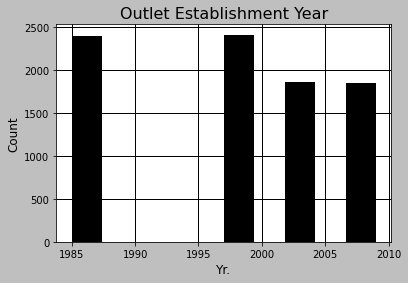

In [124]:
df['Outlet_Establishment_Year'].hist();
plt.title('Outlet Establishment Year');
plt.xlabel('Yr.');
plt.ylabel('Count');
#histogram of Outlet Establishment Year

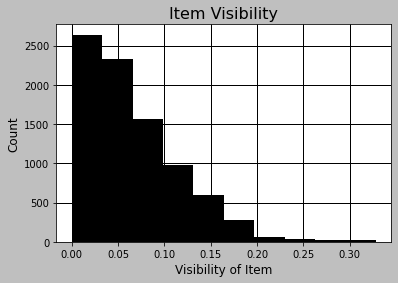

In [125]:
df['Item_Visibility'].hist();
plt.title('Item Visibility');
plt.xlabel('Visibility of Item');
plt.ylabel('Count');
#histogram of Item Visibility

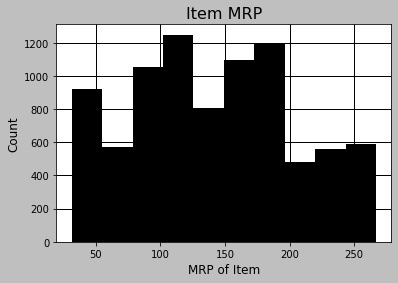

In [126]:
df['Item_MRP'].hist();
plt.title('Item MRP');
plt.xlabel('MRP of Item');
plt.ylabel('Count');
#histogram of Item MRP

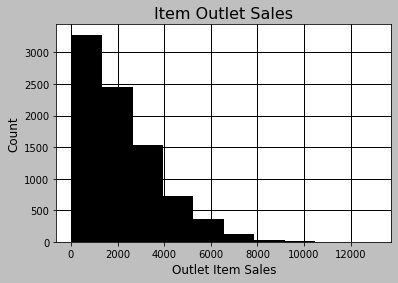

In [127]:
df['Item_Outlet_Sales'].hist();
plt.title('Item Outlet Sales');
plt.xlabel('Outlet Item Sales');
plt.ylabel('Count');
#histogram of Item Outlet Sales

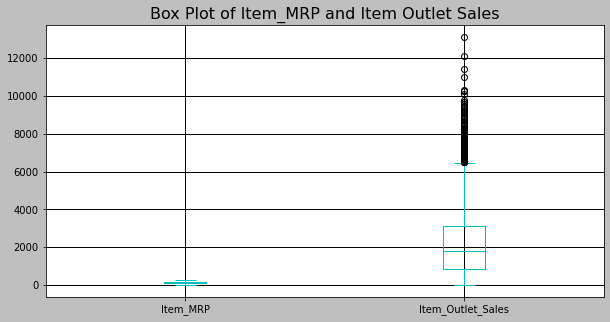

In [128]:
from IPython.core.pylabtools import figsize

plt.figure(figsize=(10,5));
df.boxplot(['Item_MRP', 'Item_Outlet_Sales'],
           color = 'c');
plt.title('Box Plot of Item_MRP and Item Outlet Sales')
patch_artist=True
#Boxplot of Item MRP and Item Outlet Sales

In [129]:
corr = df.corr()
corr

,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Visibility,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,-0.128625,0.567574,-0.049135,1.000000


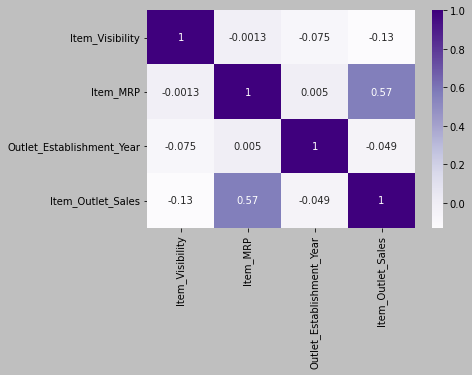

In [130]:
sns.heatmap(corr, cmap = 'Purples', annot =True);
#Correlation Heatmap 

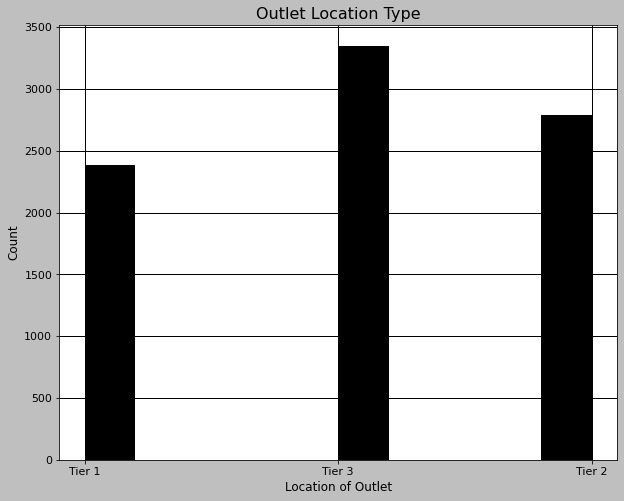

In [131]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(10)
df['Outlet_Location_Type'].hist();
plt.style.use('Solarize_Light2')
plt.xlabel('Location of Outlet', c='black', fontsize=12);
plt.ylabel('Count', c='black', fontsize=12);
plt.xticks(fontsize=11, c='black');
plt.yticks(fontsize=11, c='black');
plt.title('Outlet Location Type');
#histogram of Oulet Location Type

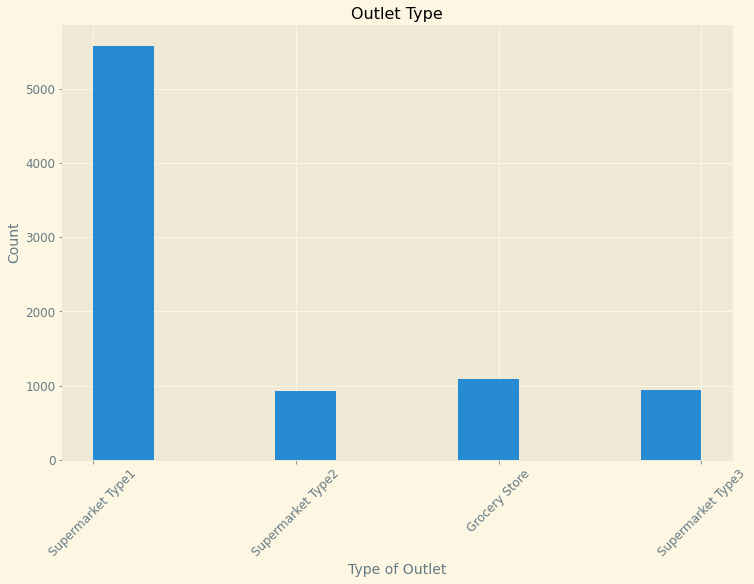

In [132]:
fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(12)
plt.xticks(rotation = 45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Type of Outlet', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Outlet Type')
plt.style.use('grayscale')
df['Outlet_Type'].hist();
#histogram of Outlet Type

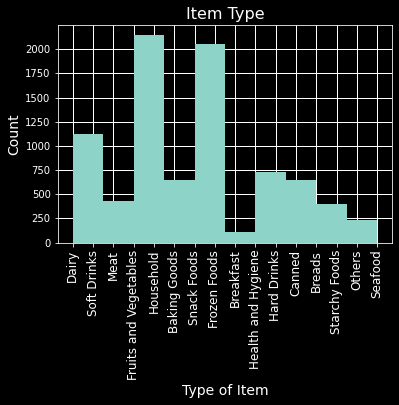

In [133]:
plt.style.use('dark_background')
df['Item_Type'].hist();

plt.xticks(rotation = 90);
plt.xlabel('Type of Item', fontsize=14);
plt.ylabel('Count', fontsize=14);
plt.xticks(fontsize=12);
plt.title('Item Type');
#histogram of Item Type

In [134]:
df = pd.read_csv(sales_predictions)
#Original dataframe

In [135]:
df.isna().sum()
#total missing values in our dataframe

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [136]:
target = 'Item_Outlet_Sales'
X = df.drop(columns=target, axis=1)
y = df[target]
#the features (X) and target (y)

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
#train test split 

In [138]:
display(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6392 entries, 4776 to 7270
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            6392 non-null   object 
 1   Item_Weight                5285 non-null   float64
 2   Item_Fat_Content           6392 non-null   object 
 3   Item_Visibility            6392 non-null   float64
 4   Item_Type                  6392 non-null   object 
 5   Item_MRP                   6392 non-null   float64
 6   Outlet_Identifier          6392 non-null   object 
 7   Outlet_Establishment_Year  6392 non-null   int64  
 8   Outlet_Size                4580 non-null   object 
 9   Outlet_Location_Type       6392 non-null   object 
 10  Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 599.2+ KB


None

In [139]:
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [148]:
freq_imputer = SimpleImputer(strategy='most_frequent')
mean_imputer = SimpleImputer(strategy='mean')

In [149]:
scaler = StandardScaler()
ohe__encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [142]:
numeric_pipe = make_pipeline(mean_imputer, scaler)
numeric_pipe
#numeric pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [143]:
categorical_pipe = make_pipeline(freq_imputer, ohe__encoder)
categorical_pipe
#categorical pipeline

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [144]:
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

In [145]:
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b1a8df690>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f0b1a8df490>)])

In [146]:
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [147]:
print(np.isnan(X_train_processed).sum().sum(), 'missing values in training data')
print(np.isnan(X_test_processed).sum().sum(), 'missing values in testing data')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('shape of data is', X_train_processed.shape)
print('\n')
X_train_processed

0 missing values in training data
0 missing values in testing data


All data in X_train_processed are float64
All data in X_test_processed are float64


shape of data is (6392, 1595)




array([[ 0.81724868, -0.71277507,  1.82810922, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5563395 , -1.29105225,  0.60336888, ...,  0.        ,
         1.        ,  0.        ],
       [-0.13151196,  1.81331864,  0.24454056, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.11373638, -0.92052713,  1.52302674, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.76600931, -0.2277552 , -0.38377708, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.81724868, -0.95867683, -0.73836105, ...,  1.        ,
         0.        ,  0.        ]])